# Exercises clamped beam

Given is the following structure:

```{figure} ./diagrams_data/simply_supported.svg
:align: center
```

```{exercise}
:label: exercise4

Draw the shape of the moment diagram without making any calculations for a force at:
- $x= 2.5$
- $x = 7.5$

```

In [ ]:
import micropip
await micropip.install("ipympl")

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact

%matplotlib widget
%config InlineBackend.figure_formats = ['svg']

```{solution-start} exercise4
```

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to show the interactive widget which can be used to find the solution.

If the plot doesn't respond to the slider, click the figure once and try again.

interactive(children=(FloatSlider(value=2.0, description='Location force x_F = ... (m)', layout=Layout(width='…

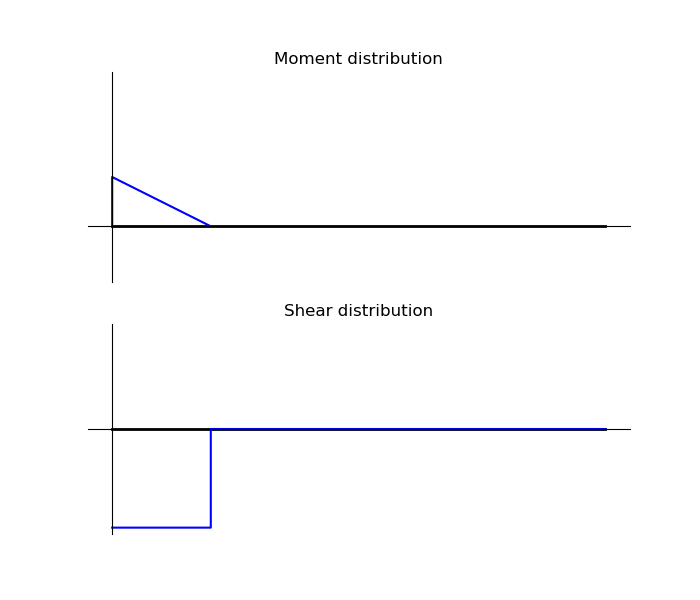

In [45]:
EI, x = sym.symbols('EI, x',real=True)

Av, Am, Bv, phi_S = sym.symbols('Av, Am, Bv, phi_S',real=True)
a = sym.symbols('a',real=True,positive=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

L1 = 5
L2 = 5
EI = 5000

q = -Av * sym.SingularityFunction(x,0,-1) - Am * sym.SingularityFunction(x,0,-2) - Bv * sym.SingularityFunction(x,L1+L2,-1) + 1 * sym.SingularityFunction(x,a,-1)
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3 + phi_S * sym.SingularityFunction(x,L1,0)
w = sym.integrate(phi,x)+C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(phi.subs(x,0),0)
eq3 = sym.Eq(w.subs(x,L1+L2),0)
eq4 = sym.Eq(M.subs(x,-1),0)
eq5 = sym.Eq(M.subs(x,L1),0)
eq6 = sym.Eq(V.subs(x,-1),0)
eq7 = sym.Eq(V.subs(x,L1+L2+1),0)
eq8 = sym.Eq(M.subs(x,L1+L2),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8],[C1,C2,C3,C4,Av,Bv,Am,phi_S])
V_sol = V.subs(sol)
V_subs = V_sol
V_numpy = sym.lambdify([a,x],V_sol.rewrite(sym.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol
M_numpy = sym.lambdify([a,x],M_sol.rewrite(sym.Piecewise))

fig, axs = plt.subplots(2, 1, figsize=(7, 6))
def func(a):
    x = 0
    x = np.append(x,np.linspace(0.0001,a-0.0001,2))
    x = np.append(x,np.linspace(a+0.0001,10,2))
    x = np.append(x,10)
    axs[0].clear()  # Clear the existing plot
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,M_numpy(a,x)/2,color='blue')
    #axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    #axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    axs[0].set_ylim(1,-3)
    title0 = 'Moment distribution'
    axs[0].set_title(title0)

    axs[1].clear()  # Clear the existing plot
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,V_numpy(a,x)*2,color='blue')
    #axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    #axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[1].invert_yaxis()
    axs[1].set_ylim(2,-2)
    title0 = 'Shear distribution'
    axs[1].set_title(title0)

    axs[0].set_yticks([])
    axs[0].set_xticks([])
    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_position('zero')

    axs[1].set_yticks([])
    axs[1].set_xticks([])
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_position('zero')

    # set background transparent
    fig.patch.set_alpha(0.0)
    axs[0].patch.set_alpha(0.0)
    axs[1].patch.set_alpha(0.0)

    plt.draw()  

    
interact(func, a = widgets.FloatSlider(min=0.1, max=9.9, value=2, step=0.1, description="Location force x_F = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}));

```{solution-end}
```

```{exercise}
:label: exercise5

Draw the shape of the shear force diagram without making any calculations for a distributed load between:
- $x=0$ and $x=5$
- $x=2.5$ and $x=7.5$
- $x=5$ and $x=10$
- $x=7.5$ and $x=10$
```

```{solution-start} exercise5
```

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to show the interactive widget which can be used to find the solution.

If the plot doesn't respond to the slider, click the figure once and try again.

interactive(children=(FloatSlider(value=0.1, description='Location start distributed load x_start = ... (m)', …

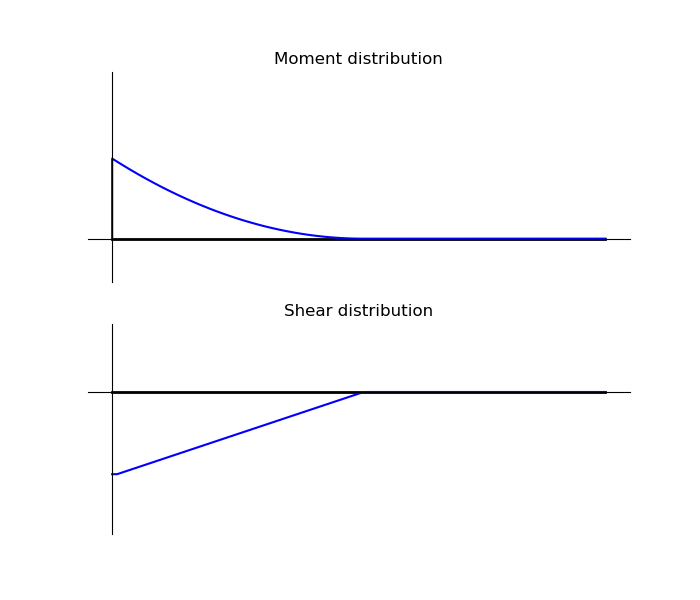

In [33]:
EI_new, x_new = sym.symbols('EI_new, x_new', real=True)
Av_new, Am_new, Bv_new, phi_S_new = sym.symbols('Av_new, Am_new, Bv_new, phi_S_new', real=True)
a_new, b_new = sym.symbols('a_new, b_new', real=True, positive=True)
C1_new, C2_new, C3_new, C4_new = sym.symbols('C1_new, C2_new, C3_new, C4_new')

L1_new = 5
L2_new = 5
EI_new = 5000

q_new = -Av_new * sym.SingularityFunction(x_new, 0, -1) - Am_new * sym.SingularityFunction(x_new, 0, -2) - Bv_new * sym.SingularityFunction(x_new, L1_new + L2_new, -1) + sym.SingularityFunction(x_new, a_new, 0) - sym.SingularityFunction(x_new, a_new + b_new, 0)
V_new = -sym.integrate(q_new, x_new) + C1_new
M_new = sym.integrate(V_new, x_new) + C2_new
kappa_new = M_new / EI_new
phi_new = sym.integrate(kappa_new, x_new) + C3_new + phi_S_new * sym.SingularityFunction(x_new, L1_new, 0)
w_new = sym.integrate(phi_new, x_new) + C4_new
eq1_new = sym.Eq(w_new.subs(x_new, 0), 0)
eq2_new = sym.Eq(phi_new.subs(x_new, 0), 0)
eq3_new = sym.Eq(w_new.subs(x_new, L1_new + L2_new), 0)
eq4_new = sym.Eq(M_new.subs(x_new, -1), 0)
eq5_new = sym.Eq(M_new.subs(x_new, L1_new), 0)
eq6_new = sym.Eq(V_new.subs(x_new, -1), 0)
eq7_new = sym.Eq(V_new.subs(x_new, L1_new + L2_new + 1), 0)
eq8_new = sym.Eq(M_new.subs(x_new, L1_new + L2_new), 0)
sol_new = sym.solve([eq1_new, eq2_new, eq3_new, eq4_new, eq5_new, eq6_new, eq7_new, eq8_new], [C1_new, C2_new, C3_new, C4_new, Av_new, Bv_new, Am_new, phi_S_new])
V_sol_new = V_new.subs(sol_new)
V_subs_new = V_sol_new
V_numpy_new = sym.lambdify([a_new, b_new, x_new], V_sol_new.rewrite(sym.Piecewise))
M_sol_new = M_new.subs(sol_new)
M_subs_new = M_sol_new
M_numpy_new = sym.lambdify([a_new, b_new, x_new], M_sol_new.rewrite(sym.Piecewise))

fig_new, axs_new = plt.subplots(2, 1, figsize=(7, 6))
def func_new(a_new, b_new):
    x_new = 0
    x_new = np.append(x_new, np.linspace(0.0001, 10 - 0.0001, 100))
    x_new = np.append(x_new, 10)
    axs_new[0].clear()  # Clear the existing plot
    axs_new[0].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_new[0].grid()
    axs_new[0].axis('equal')
    axs_new[0].plot(x_new, M_numpy_new(a_new, b_new, x_new)/8, color='blue')
    axs_new[0].invert_yaxis()
    axs_new[0].set_ylim(1, -3.5)
    title0_new = 'Moment distribution'
    axs_new[0].set_title(title0_new)

    axs_new[1].clear()  # Clear the existing plot
    axs_new[1].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_new[1].grid()
    axs_new[1].axis('equal')
    axs_new[1].plot(x_new, V_numpy_new(a_new, b_new, x_new)/3, color='blue')
    axs_new[1].invert_yaxis()
    axs_new[1].set_ylim(2.5, -1)
    title1_new = 'Shear distribution'
    axs_new[1].set_title(title1_new)

    axs_new[0].set_yticks([])
    axs_new[0].set_xticks([])
    axs_new[0].spines['right'].set_color('none')
    axs_new[0].spines['top'].set_color('none')
    axs_new[0].spines['bottom'].set_position('zero')
    axs_new[0].spines['left'].set_position('zero')

    axs_new[1].set_yticks([])
    axs_new[1].set_xticks([])
    axs_new[1].spines['right'].set_color('none')
    axs_new[1].spines['top'].set_color('none')
    axs_new[1].spines['bottom'].set_position('zero')
    axs_new[1].spines['left'].set_position('zero')

    fig_new.patch.set_alpha(0.0)
    axs_new[0].patch.set_alpha(0.0)
    axs_new[1].patch.set_alpha(0.0)

    plt.draw()
    
interact(func_new, a_new=widgets.FloatSlider(min=0.1, max=9.9, value=0, step=0.1, description="Location start distributed load x_start = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}), 
         b_new=widgets.FloatSlider(min=0.1, max=9.9, value=5, step=0.1, description="Length distributed load x_end = x_start + ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}));


```{solution-end}
```

```{exercise-start}
:label: exercise6

What happens to the shape of the moment and shear force diagram when combining the results from above? Try to answer the following questions:
- Where can you find a kink?
- Where can you find a jump?
- Where is the bending moment always 0?
- Where is the shear force always 0?
- Where is the bending moment line always linear or quadratic?
- Where is the bending moment line always (nonzero-)constant or linear?

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to show the interactive widget.

If the plot doesn't respond to the slider, click the figure once and try again.
```

interactive(children=(FloatSlider(value=0.0, description='Location start distributed load x_start = ... (m)', …

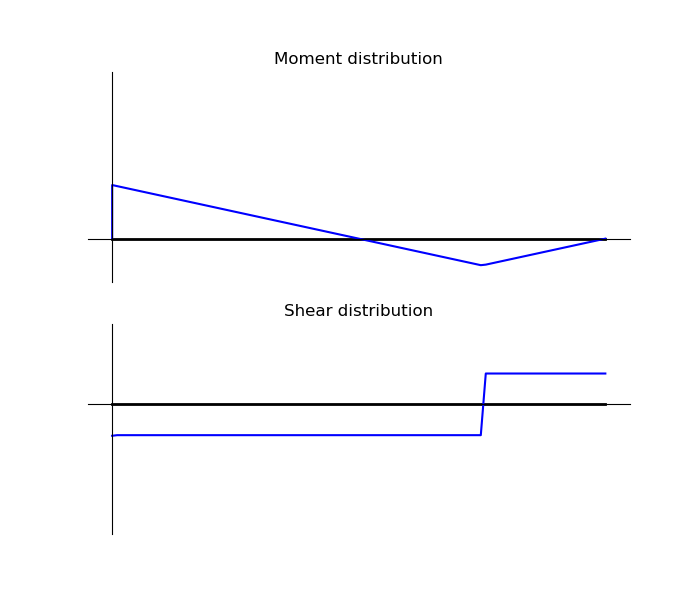

In [49]:
EI_alt, x_alt = sym.symbols('EI_alt, x_alt', real=True)
Av_alt, Am_alt, Bv_alt, phi_S_alt = sym.symbols('Av_alt, Am_alt, Bv_alt, phi_S_alt', real=True)
a_alt, b_alt, c_alt = sym.symbols('a_alt, b_alt, c_alt', real=True, positive=True)
C1_alt, C2_alt, C3_alt, C4_alt = sym.symbols('C1_alt, C2_alt, C3_alt, C4_alt')

L1_alt = 5
L2_alt = 5
EI_alt = 5000

q_alt = -Av_alt * sym.SingularityFunction(x_alt, 0 , -1) - Am_alt * sym.SingularityFunction(x_alt, 0, -2) - Bv_alt * sym.SingularityFunction(x_alt, L1_alt + L2_alt, -1) + sym.SingularityFunction(x_alt, a_alt, 0)- sym.SingularityFunction(x_alt, a_alt + b_alt, 0) + 10 * sym.SingularityFunction(x_alt, c_alt, -1)
V_alt = -sym.integrate(q_alt, x_alt) + C1_alt
M_alt = sym.integrate(V_alt, x_alt) + C2_alt
kappa_alt = M_alt / EI_alt
phi_alt = sym.integrate(kappa_alt, x_alt) + C3_alt + phi_S_alt * sym.SingularityFunction(x_alt, L1_alt, 0)
w_alt = sym.integrate(phi_alt, x_alt) + C4_alt
eq1_alt = sym.Eq(w_alt.subs(x_alt, 0), 0)
eq2_alt = sym.Eq(phi_alt.subs(x_alt, 0), 0)
eq3_alt = sym.Eq(w_alt.subs(x_alt, L1_alt + L2_alt), 0)
eq4_alt = sym.Eq(M_alt.subs(x_alt, -1), 0)
eq5_alt = sym.Eq(M_alt.subs(x_alt, L1_alt), 0)
eq6_alt = sym.Eq(V_alt.subs(x_alt, -1), 0)
eq7_alt = sym.Eq(V_alt.subs(x_alt, L1_alt + L2_alt + 1), 0)
eq8_alt = sym.Eq(M_alt.subs(x_alt, L1_alt + L2_alt), 0)
sol_alt = sym.solve([eq1_alt, eq2_alt, eq3_alt, eq4_alt, eq5_alt, eq6_alt, eq7_alt, eq8_alt], [C1_alt, C2_alt, C3_alt, C4_alt, Av_alt, Bv_alt, Am_alt, phi_S_alt])
V_sol_alt = V_alt.subs(sol_alt)
V_subs_alt = V_sol_alt
V_numpy_alt = sym.lambdify([a_alt, b_alt, c_alt, x_alt], V_sol_alt.rewrite(sym.Piecewise))
M_sol_alt = M_alt.subs(sol_alt)
M_subs_alt = M_sol_alt
M_numpy_alt = sym.lambdify([a_alt, b_alt, c_alt, x_alt], M_sol_alt.rewrite(sym.Piecewise))

fig_alt, axs_alt = plt.subplots(2, 1, figsize=(7, 6))
def func_alt(a_alt, b_alt, c_alt):
    x_alt = 0
    x_alt = np.append(x_alt, np.linspace(0.0001, 10, 100))
    x_alt = np.append(x_alt, 10)
    axs_alt[0].clear()  # Clear the existing plot
    axs_alt[0].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_alt[0].grid()
    axs_alt[0].axis('equal')
    axs_alt[0].plot(x_alt, M_numpy_alt(a_alt, b_alt, c_alt, x_alt) / 23, color='blue')
    axs_alt[0].invert_yaxis()
    axs_alt[0].set_ylim(1.75, -4.25)
    title0_alt = 'Moment distribution'
    axs_alt[0].set_title(title0_alt)

    axs_alt[1].clear()  # Clear the existing plot
    axs_alt[1].plot([0, 10], [0, 0], color='black', linewidth=2)
    axs_alt[1].grid()
    axs_alt[1].axis('equal')
    axs_alt[1].plot(x_alt, V_numpy_alt(a_alt, b_alt, c_alt, x_alt) / 8, color='blue')
    axs_alt[1].invert_yaxis()
    axs_alt[1].set_ylim(2.5, -1.5)
    title1_alt = 'Shear distribution'
    axs_alt[1].set_title(title1_alt)

    axs_alt[0].set_yticks([])
    axs_alt[0].set_xticks([])
    axs_alt[0].spines['right'].set_color('none')
    axs_alt[0].spines['top'].set_color('none')
    axs_alt[0].spines['bottom'].set_position('zero')
    axs_alt[0].spines['left'].set_position('zero')

    axs_alt[1].set_yticks([])
    axs_alt[1].set_xticks([])
    axs_alt[1].spines['right'].set_color('none')
    axs_alt[1].spines['top'].set_color('none')
    axs_alt[1].spines['bottom'].set_position('zero')
    axs_alt[1].spines['left'].set_position('zero')

    fig_alt.patch.set_alpha(0.0)
    axs_alt[0].patch.set_alpha(0.0)
    axs_alt[1].patch.set_alpha(0.0)

    plt.draw()

interact(func_alt, a_alt=widgets.FloatSlider(min=0, max=10, value=0, step=0.1, description="Location start distributed load x_start = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}), 
         b_alt=widgets.FloatSlider(min=0.1, max=10, value=0, step=0.1, description="Length distributed load x_end = x_start + ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}),
         c_alt=widgets.FloatSlider(min=0, max=10, value=7.5, step=0.1, description="Location force x_F = ... (m)", readout_format='.1f', style={'description_width': '280px'}, layout={'width': '500px'}));


```{exercise-end}
```